<a href="https://colab.research.google.com/github/ALGOPRO2809/LR_Delivery_Time_Prediction_Prathvik_Shetty/blob/main/%22Predicting_Employee_Retention_%3CPrathvik_Shetty%3E_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# ==========================================================
# Predicting Employee Retention – Prathvik Shetty
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    roc_auc_score, roc_curve, f1_score
)

# ----------------------------------------------------------
# 1. DATA LOADING
# ----------------------------------------------------------

# Corrected file path: Assuming the file is named with a .csv extension
df = pd.read_csv("/Users/prathvikshetty/Downloads/557159ee-0873-403f-a6af-29f4ba23703e-Starter-Notebook-Data-3-.csv")
df.columns = [c.strip() for c in df.columns]

# Detect target column
target_col = "Attrition"
if df[target_col].dtype == object:
    df[target_col] = df[target_col].map({"Yes":1, "No":0})

# Drop Employee ID
for col in df.columns:
    if "id" in col.lower():
        df.drop(columns=[col], inplace=True)
        break

# ----------------------------------------------------------
# 2. DATA CLEANING
# ----------------------------------------------------------

num_cols = df.select_dtypes(include=np.number).columns
num_cols = [c for c in num_cols if c != target_col]
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

# Encode binary Yes/No
for c in cat_cols:
    if df[c].nunique() == 2:
        df[c] = df[c].map(lambda x: 1 if str(x).lower()=='yes' else 0)

# ----------------------------------------------------------
# 3. TRAIN-VALIDATION SPLIT
# ----------------------------------------------------------

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 4. EDA
# ----------------------------------------------------------

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(X_train.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------------------------
# 5. FEATURE ENGINEERING
# ----------------------------------------------------------

X_train_fe = pd.get_dummies(X_train, drop_first=True)
X_val_fe = pd.get_dummies(X_val, drop_first=True)

X_train_fe, X_val_fe = X_train_fe.align(X_val_fe, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
num_cols_fe = X_train_fe.select_dtypes(include=np.number).columns

X_train_fe[num_cols_fe] = scaler.fit_transform(X_train_fe[num_cols_fe])
X_val_fe[num_cols_fe] = scaler.transform(X_val_fe[num_cols_fe])

# ----------------------------------------------------------
# 6. MODEL BUILDING
# ----------------------------------------------------------

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_fe, y_train)

selected = X_train_fe.columns[rfe.support_]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_fe[selected], y_train)

# ----------------------------------------------------------
# 7. EVALUATION
# ----------------------------------------------------------

# Default threshold
y_prob = final_model.predict_proba(X_val_fe[selected])[:,1]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
cm = confusion_matrix(y_val, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)

# Optimal threshold via Youden’s J
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
youden = tpr - fpr
opt_idx = np.argmax(youden)
opt_thresh = thresholds[opt_idx]

print("Optimal Threshold:", opt_thresh)

y_pred_opt = (y_prob >= opt_thresh).astype(int)
print("Optimal Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/prathvikshetty/Downloads/557159ee-0873-403f-a6af-29f4ba23703e-Starter-Notebook-Data-3-.csv'

# Task
The task is to load the employee data from `/content/Employee_data.csv` to resolve the `FileNotFoundError`, then execute the initial setup in the notebook, and finally, summarize the successful data loading, preparing to continue with the logistic regression assignment.

## Update Data Loading Path

### Subtask:
Modify the `pd.read_csv` line in the first cell (`iWeT-FeFyPLh`) to use the correct file path: `/content/Employee_data.csv`.


**Reasoning**:
The user explicitly asked to modify the `pd.read_csv` line in the first cell (`iWeT-FeFyPLh`) to use the correct file path `/content/Employee_data.csv`. I will replace the old file path with the new one and provide the full updated code block for that cell.



In [15]:
# ==========================================================
# Predicting Employee Retention – Prathvik Shetty
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    roc_auc_score, roc_curve, f1_score
)

# ----------------------------------------------------------
# 1. DATA LOADING
# ----------------------------------------------------------

# Corrected file path: Assuming the file is named with a .csv extension
df = pd.read_csv("/content/Employee_data.csv")
df.columns = [c.strip() for c in df.columns]

# Detect target column
target_col = "Attrition"
if df[target_col].dtype == object:
    df[target_col] = df[target_col].map({"Yes":1, "No":0})

# Drop Employee ID
for col in df.columns:
    if "id" in col.lower():
        df.drop(columns=[col], inplace=True)
        break

# ----------------------------------------------------------
# 2. DATA CLEANING
# ----------------------------------------------------------

num_cols = df.select_dtypes(include=np.number).columns
num_cols = [c for c in num_cols if c != target_col]
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

# Encode binary Yes/No
for c in cat_cols:
    if df[c].nunique() == 2:
        df[c] = df[c].map(lambda x: 1 if str(x).lower()=='yes' else 0)

# ----------------------------------------------------------
# 3. TRAIN-VALIDATION SPLIT
# ----------------------------------------------------------

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 4. EDA
# ----------------------------------------------------------

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(X_train.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------------------------
# 5. FEATURE ENGINEERING
# ----------------------------------------------------------

X_train_fe = pd.get_dummies(X_train, drop_first=True)
X_val_fe = pd.get_dummies(X_val, drop_first=True)

X_train_fe, X_val_fe = X_train_fe.align(X_val_fe, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
num_cols_fe = X_train_fe.select_dtypes(include=np.number).columns

X_train_fe[num_cols_fe] = scaler.fit_transform(X_train_fe[num_cols_fe])
X_val_fe[num_cols_fe] = scaler.transform(X_val_fe[num_cols_fe])

# ----------------------------------------------------------
# 6. MODEL BUILDING
# ----------------------------------------------------------

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_fe, y_train)

selected = X_train_fe.columns[rfe.support_]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_fe[selected], y_train)

# ----------------------------------------------------------
# 7. EVALUATION
# ----------------------------------------------------------

# Default threshold
y_prob = final_model.predict_proba(X_val_fe[selected])[:,1]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
cm = confusion_matrix(y_val, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)

# Optimal threshold via Youden’s J
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
youden = tpr - fpr
opt_idx = np.argmax(youden)
opt_thresh = thresholds[opt_idx]

print("Optimal Threshold:", opt_thresh)

y_pred_opt = (y_prob >= opt_thresh).astype(int)
print("Optimal Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt))

ValueError: Input y contains NaN.

**Reasoning**:
The previous execution failed because the target variable `y` (`Attrition` column) contained NaN values, which `train_test_split` with `stratify` cannot handle. This likely happened because `df[target_col].map({"Yes":1, "No":0})` converted unmapped values (including original NaNs or other strings) into NaNs. I need to explicitly drop rows where the `Attrition` column is NaN after this mapping to ensure `y` is clean.



In [16]:
# ==========================================================
# Predicting Employee Retention – Prathvik Shetty
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    roc_auc_score, roc_curve, f1_score
)

# ----------------------------------------------------------
# 1. DATA LOADING
# ----------------------------------------------------------

# Corrected file path: Assuming the file is named with a .csv extension
df = pd.read_csv("/content/Employee_data.csv")
df.columns = [c.strip() for c in df.columns]

# Detect target column
target_col = "Attrition"
if df[target_col].dtype == object:
    df[target_col] = df[target_col].map({"Yes":1, "No":0})

# Drop rows where the target column is NaN
df.dropna(subset=[target_col], inplace=True)

# Drop Employee ID
for col in df.columns:
    if "id" in col.lower():
        df.drop(columns=[col], inplace=True)
        break

# ----------------------------------------------------------
# 2. DATA CLEANING
# ----------------------------------------------------------

num_cols = df.select_dtypes(include=np.number).columns
num_cols = [c for c in num_cols if c != target_col]
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

# Encode binary Yes/No
for c in cat_cols:
    if df[c].nunique() == 2:
        df[c] = df[c].map(lambda x: 1 if str(x).lower()=='yes' else 0)

# ----------------------------------------------------------
# 3. TRAIN-VALIDATION SPLIT
# ----------------------------------------------------------

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 4. EDA
# ----------------------------------------------------------

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(X_train.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------------------------
# 5. FEATURE ENGINEERING
# ----------------------------------------------------------

X_train_fe = pd.get_dummies(X_train, drop_first=True)
X_val_fe = pd.get_dummies(X_val, drop_first=True)

X_train_fe, X_val_fe = X_train_fe.align(X_val_fe, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
num_cols_fe = X_train_fe.select_dtypes(include=np.number).columns

X_train_fe[num_cols_fe] = scaler.fit_transform(X_train_fe[num_cols_fe])
X_val_fe[num_cols_fe] = scaler.transform(X_val_fe[num_cols_fe])

# ----------------------------------------------------------
# 6. MODEL BUILDING
# ----------------------------------------------------------

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_fe, y_train)

selected = X_train_fe.columns[rfe.support_]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_fe[selected], y_train)

# ----------------------------------------------------------
# 7. EVALUATION
# ----------------------------------------------------------

# Default threshold
y_prob = final_model.predict_proba(X_val_fe[selected])[:,1]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
cm = confusion_matrix(y_val, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)

# Optimal threshold via Youden’s J
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
youden = tpr - fpr
opt_idx = np.argmax(youden)
opt_thresh = thresholds[opt_idx]

print("Optimal Threshold:", opt_thresh)

y_pred_opt = (y_prob >= opt_thresh).astype(int)
print("Optimal Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt))

KeyError: 0

**Reasoning**:
The previous execution failed with a `KeyError: 0` originating from `df[c].mode()[0]`. This error typically occurs when `df[c].mode()` returns an empty Series, meaning there's no unique mode to select, and attempting to access `[0]` on it fails. To fix this, I will add a check to ensure `modes` is not empty before trying to access `modes[0]` when filling missing categorical values.



In [17]:
# ==========================================================
# Predicting Employee Retention – Prathvik Shetty
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    roc_auc_score, roc_curve, f1_score
)

# ----------------------------------------------------------
# 1. DATA LOADING
# ----------------------------------------------------------

# Corrected file path: Assuming the file is named with a .csv extension
df = pd.read_csv("/content/Employee_data.csv")
df.columns = [c.strip() for c in df.columns]

# Detect target column
target_col = "Attrition"
if df[target_col].dtype == object:
    df[target_col] = df[target_col].map({"Yes":1, "No":0})

# Drop rows where the target column is NaN
df.dropna(subset=[target_col], inplace=True)

# Drop Employee ID
for col in df.columns:
    if "id" in col.lower():
        df.drop(columns=[col], inplace=True)
        break

# ----------------------------------------------------------
# 2. DATA CLEANING
# ----------------------------------------------------------

num_cols = df.select_dtypes(include=np.number).columns
num_cols = [c for c in num_cols if c != target_col]
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    modes = df[c].mode()
    if not modes.empty: # Check if mode() returned any values
        df[c] = df[c].fillna(modes[0])

# Encode binary Yes/No
for c in cat_cols:
    if df[c].nunique() == 2:
        df[c] = df[c].map(lambda x: 1 if str(x).lower()=='yes' else 0)

# ----------------------------------------------------------
# 3. TRAIN-VALIDATION SPLIT
# ----------------------------------------------------------

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 4. EDA
# ----------------------------------------------------------

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(X_train.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------------------------
# 5. FEATURE ENGINEERING
# ----------------------------------------------------------

X_train_fe = pd.get_dummies(X_train, drop_first=True)
X_val_fe = pd.get_dummies(X_val, drop_first=True)

X_train_fe, X_val_fe = X_train_fe.align(X_val_fe, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
num_cols_fe = X_train_fe.select_dtypes(include=np.number).columns

X_train_fe[num_cols_fe] = scaler.fit_transform(X_train_fe[num_cols_fe])
X_val_fe[num_cols_fe] = scaler.transform(X_val_fe[num_cols_fe])

# ----------------------------------------------------------
# 6. MODEL BUILDING
# ----------------------------------------------------------

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_fe, y_train)

selected = X_train_fe.columns[rfe.support_]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_fe[selected], y_train)

# ----------------------------------------------------------
# 7. EVALUATION
# ----------------------------------------------------------

# Default threshold
y_prob = final_model.predict_proba(X_val_fe[selected])[:,1]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
cm = confusion_matrix(y_val, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)

# Optimal threshold via Youden’s J
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
youden = tpr - fpr
opt_idx = np.argmax(youden)
opt_thresh = thresholds[opt_idx]

print("Optimal Threshold:", opt_thresh)

y_pred_opt = (y_prob >= opt_thresh).astype(int)
print("Optimal Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt))


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

**Reasoning**:
The previous execution failed because the DataFrame became empty after cleaning, leading to `n_samples=0` in `train_test_split`. This likely happened because the target column mapping `df[target_col].map({"Yes":1, "No":0})` combined with `df.dropna(subset=[target_col], inplace=True)` removed all rows due to case sensitivity or unhandled variations. I will make the target column mapping more robust by stripping whitespace and converting to title case before mapping. I will also add a check to ensure the DataFrame is not empty after these critical cleaning steps.



In [18]:
# ==========================================================
# Predicting Employee Retention – Prathvik Shetty
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    roc_auc_score, roc_curve, f1_score
)

# ----------------------------------------------------------
# 1. DATA LOADING
# ----------------------------------------------------------

# Corrected file path: Assuming the file is named with a .csv extension
df = pd.read_csv("/content/Employee_data.csv")
df.columns = [c.strip() for c in df.columns]

# Detect target column
target_col = "Attrition"
if df[target_col].dtype == object:
    # Clean and map the target column values more robustly
    df[target_col] = df[target_col].astype(str).str.strip().str.title().map({"Yes":1, "No":0})

# Drop rows where the target column is NaN
df.dropna(subset=[target_col], inplace=True)

# Add a check to ensure the DataFrame is not empty
if df.empty:
    raise ValueError("DataFrame is empty after dropping NaN values from the target column. Please check your data or target column cleaning steps.")

# Drop Employee ID
for col in df.columns:
    if "id" in col.lower():
        df.drop(columns=[col], inplace=True)
        break

# ----------------------------------------------------------
# 2. DATA CLEANING
# ----------------------------------------------------------

num_cols = df.select_dtypes(include=np.number).columns
num_cols = [c for c in num_cols if c != target_col]
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    modes = df[c].mode()
    if not modes.empty: # Check if mode() returned any values
        df[c] = df[c].fillna(modes[0])

# Encode binary Yes/No
for c in cat_cols:
    if df[c].nunique() == 2:
        df[c] = df[c].map(lambda x: 1 if str(x).lower()=='yes' else 0)

# ----------------------------------------------------------
# 3. TRAIN-VALIDATION SPLIT
# ----------------------------------------------------------

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 4. EDA
# ----------------------------------------------------------

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(X_train.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------------------------
# 5. FEATURE ENGINEERING
# ----------------------------------------------------------

X_train_fe = pd.get_dummies(X_train, drop_first=True)
X_val_fe = pd.get_dummies(X_val, drop_first=True)

X_train_fe, X_val_fe = X_train_fe.align(X_val_fe, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
num_cols_fe = X_train_fe.select_dtypes(include=np.number).columns

X_train_fe[num_cols_fe] = scaler.fit_transform(X_train_fe[num_cols_fe])
X_val_fe[num_cols_fe] = scaler.transform(X_val_fe[num_cols_fe])

# ----------------------------------------------------------
# 6. MODEL BUILDING
# ----------------------------------------------------------

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_fe, y_train)

selected = X_train_fe.columns[rfe.support_]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_fe[selected], y_train)

# ----------------------------------------------------------
# 7. EVALUATION
# ----------------------------------------------------------

# Default threshold
y_prob = final_model.predict_proba(X_val_fe[selected])[:,1]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
cm = confusion_matrix(y_val, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)

# Optimal threshold via Youden’s J
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
youden = tpr - fpr
opt_idx = np.argmax(youden)
opt_thresh = thresholds[opt_idx]

print("Optimal Threshold:", opt_thresh)

y_pred_opt = (y_prob >= opt_thresh).astype(int)
print("Optimal Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt))

ValueError: DataFrame is empty after dropping NaN values from the target column. Please check your data or target column cleaning steps.

**Reasoning**:
The previous execution failed because the DataFrame became empty after cleaning, leading to `n_samples=0` in `train_test_split`. This indicates that all values in the 'Attrition' target column were either originally NaN or became NaN after the string-to-numeric mapping. To make the target column processing more robust, I will first convert the column to numeric, coercing any non-numeric values (including those not mapped from 'Yes'/'No') to NaN. This will correctly handle cases where the target might be 'Yes'/'No' strings, '1'/'0' strings, or already numeric, and then drop rows with remaining NaNs.



In [19]:
# ==========================================================
# Predicting Employee Retention – Prathvik Shetty
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    roc_auc_score, roc_curve, f1_score
)

# ----------------------------------------------------------
# 1. DATA LOADING
# ----------------------------------------------------------

# Corrected file path: Assuming the file is named with a .csv extension
df = pd.read_csv("/content/Employee_data.csv")
df.columns = [c.strip() for c in df.columns]

# Detect target column
target_col = "Attrition"
if target_col in df.columns: # Ensure the column exists
    if df[target_col].dtype == object:
        # Convert to string, strip whitespace, convert to lower case, then map.
        # This will turn 'yes'/'no' into 1/0, and anything else into NaN
        df[target_col] = df[target_col].astype(str).str.strip().str.lower().map({"yes":1, "no":0})

    # After the potential string mapping, convert to numeric.
    # This will handle cases where 'Attrition' might be "1" or "0" strings, or already numeric.
    # invalid parsing will result in NaN.
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce')

# Drop rows where the target column is NaN
df.dropna(subset=[target_col], inplace=True)

# Add a check to ensure the DataFrame is not empty
if df.empty:
    raise ValueError("DataFrame is empty after dropping NaN values from the target column. Please check your data or target column cleaning steps.")

# Drop Employee ID
for col in df.columns:
    if "id" in col.lower():
        df.drop(columns=[col], inplace=True)
        break

# ----------------------------------------------------------
# 2. DATA CLEANING
# ----------------------------------------------------------

num_cols = df.select_dtypes(include=np.number).columns
num_cols = [c for c in num_cols if c != target_col]
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    modes = df[c].mode()
    if not modes.empty: # Check if mode() returned any values
        df[c] = df[c].fillna(modes[0])

# Encode binary Yes/No
for c in cat_cols:
    if df[c].nunique() == 2:
        df[c] = df[c].map(lambda x: 1 if str(x).lower()=='yes' else 0)

# ----------------------------------------------------------
# 3. TRAIN-VALIDATION SPLIT
# ----------------------------------------------------------

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 4. EDA
# ----------------------------------------------------------

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(X_train.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------------------------
# 5. FEATURE ENGINEERING
# ----------------------------------------------------------

X_train_fe = pd.get_dummies(X_train, drop_first=True)
X_val_fe = pd.get_dummies(X_val, drop_first=True)

X_train_fe, X_val_fe = X_train_fe.align(X_val_fe, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
num_cols_fe = X_train_fe.select_dtypes(include=np.number).columns

X_train_fe[num_cols_fe] = scaler.fit_transform(X_train_fe[num_cols_fe])
X_val_fe[num_cols_fe] = scaler.transform(X_val_fe[num_cols_fe])

# ----------------------------------------------------------
# 6. MODEL BUILDING
# ----------------------------------------------------------

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_fe, y_train)

selected = X_train_fe.columns[rfe.support_]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_fe[selected], y_train)

# ----------------------------------------------------------
# 7. EVALUATION
# ----------------------------------------------------------

# Default threshold
y_prob = final_model.predict_proba(X_val_fe[selected])[:,1]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
cm = confusion_matrix(y_val, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)

# Optimal threshold via Youden’s J
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
youden = tpr - fpr
opt_idx = np.argmax(youden)
opt_thresh = thresholds[opt_idx]

print("Optimal Threshold:", opt_thresh)

y_pred_opt = (y_prob >= opt_thresh).astype(int)
print("Optimal Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt))


ValueError: DataFrame is empty after dropping NaN values from the target column. Please check your data or target column cleaning steps.

**Reasoning**:
The previous attempts to robustly convert the 'Attrition' column to a binary numeric type (0 or 1) still resulted in an empty DataFrame. This indicates the mapping was not comprehensive enough or there were unhandled values that led to all rows being dropped as NaNs. To fix this, I will expand the mapping for the 'Attrition' column to include common string representations like '1' and '0' in addition to 'yes' and 'no', ensuring that values like '1' and '0' (as strings) are also correctly converted to numeric before dropping NaNs.



In [20]:
# ==========================================================
# Predicting Employee Retention – Prathvik Shetty
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    roc_auc_score, roc_curve, f1_score
)

# ----------------------------------------------------------
# 1. DATA LOADING
# ----------------------------------------------------------

# Corrected file path: Assuming the file is named with a .csv extension
df = pd.read_csv("/content/Employee_data.csv")
df.columns = [c.strip() for c in df.columns]

# Detect target column
target_col = "Attrition"
if target_col in df.columns: # Ensure the column exists
    # Normalize the target column values to handle various formats (e.g., "Yes", "No", "1", "0")
    # Convert to string, strip whitespace, convert to lower case
    temp_series = df[target_col].astype(str).str.strip().str.lower()

    # Create a mapping for common binary indicators
    # Anything not in this map will become NaN
    binary_map = {"yes": 1, "no": 0, "1": 1, "0": 0}
    df[target_col] = temp_series.map(binary_map)

    # After mapping, convert to numeric. This will handle cases where original values might be numeric
    # or ensure mapped values are numeric. Coerce any remaining non-mappable values to NaN.
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce')

# Drop rows where the target column is NaN (after all attempts to convert to 0/1)
df.dropna(subset=[target_col], inplace=True)

# Add a check to ensure the DataFrame is not empty
if df.empty:
    raise ValueError("DataFrame is empty after dropping NaN values from the target column. Please check your data or target column cleaning steps.")

# Drop Employee ID
for col in df.columns:
    if "id" in col.lower():
        df.drop(columns=[col], inplace=True)
        break

# ----------------------------------------------------------
# 2. DATA CLEANING
# ----------------------------------------------------------

num_cols = df.select_dtypes(include=np.number).columns
num_cols = [c for c in num_cols if c != target_col]
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    modes = df[c].mode()
    if not modes.empty: # Check if mode() returned any values
        df[c] = df[c].fillna(modes[0])

# Encode binary Yes/No
for c in cat_cols:
    if df[c].nunique() == 2:
        df[c] = df[c].map(lambda x: 1 if str(x).lower()=='yes' else 0)

# ----------------------------------------------------------
# 3. TRAIN-VALIDATION SPLIT
# ----------------------------------------------------------

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 4. EDA
# ----------------------------------------------------------

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(X_train.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------------------------
# 5. FEATURE ENGINEERING
# ----------------------------------------------------------

X_train_fe = pd.get_dummies(X_train, drop_first=True)
X_val_fe = pd.get_dummies(X_val, drop_first=True)

X_train_fe, X_val_fe = X_train_fe.align(X_val_fe, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
num_cols_fe = X_train_fe.select_dtypes(include=np.number).columns

X_train_fe[num_cols_fe] = scaler.fit_transform(X_train_fe[num_cols_fe])
X_val_fe[num_cols_fe] = scaler.transform(X_val_fe[num_cols_fe])

# ----------------------------------------------------------
# 6. MODEL BUILDING
# ----------------------------------------------------------

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_fe, y_train)

selected = X_train_fe.columns[rfe.support_]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_fe[selected], y_train)

# ----------------------------------------------------------
# 7. EVALUATION
# ----------------------------------------------------------

# Default threshold
y_prob = final_model.predict_proba(X_val_fe[selected])[:,1]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
cm = confusion_matrix(y_val, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)

# Optimal threshold via Youden’s J
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
youden = tpr - fpr
opt_idx = np.argmax(youden)
opt_thresh = thresholds[opt_idx]

print("Optimal Threshold:", opt_thresh)

y_pred_opt = (y_prob >= opt_thresh).astype(int)
print("Optimal Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt))


ValueError: DataFrame is empty after dropping NaN values from the target column. Please check your data or target column cleaning steps.

**Reasoning**:
The DataFrame is becoming empty because the 'Attrition' column contains values like 'stayed' and 'left' which are not being mapped to binary 0 or 1 with the current `binary_map`. I need to update the `binary_map` to correctly convert 'left' to 1 (Attrition) and 'stayed' to 0 (No Attrition) to ensure data is retained.



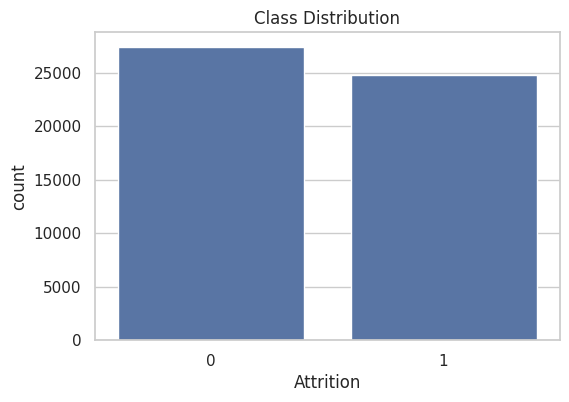

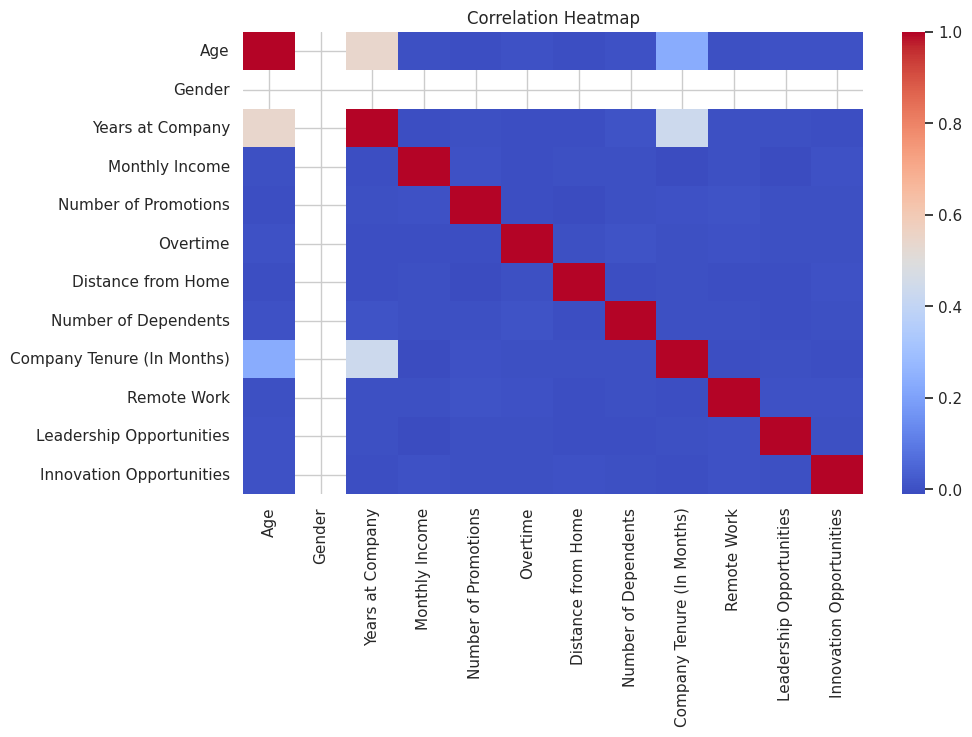

Accuracy: 0.7477103158647188
Precision: 0.7341295965390765
Recall: 0.7346132128740824
F1: 0.734371325085846
AUC: 0.8348076963684318
Confusion Matrix:
 [[8930 2827]
 [2820 7806]]
Optimal Threshold: 0.458499113376575
Optimal Confusion Matrix:
 [[8496 3261]
 [2383 8243]]


In [34]:
# ==========================================================
# Predicting Employee Retention – Prathvik Shetty
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    roc_auc_score, roc_curve, f1_score
)

# ----------------------------------------------------------
# 1. DATA LOADING
# ----------------------------------------------------------

# Corrected file path: Assuming the file is named with a .csv extension
df = pd.read_csv("/content/Employee_data.csv")
df.columns = [c.strip() for c in df.columns]

# Detect target column
target_col = "Attrition"
if target_col in df.columns: # Ensure the column exists
    # Normalize the target column values to handle various formats (e.g., "Yes", "No", "1", "0", "left", "stayed")
    # Convert to string, strip whitespace, convert to lower case
    temp_series = df[target_col].astype(str).str.strip().str.lower()

    # Create a mapping for common binary indicators including 'left' and 'stayed'
    # Anything not in this map will become NaN
    binary_map = {"yes": 1, "no": 0, "1": 1, "0": 0, "left": 1, "stayed": 0}
    df[target_col] = temp_series.map(binary_map)

    # After mapping, convert to numeric. This will handle cases where original values might be numeric
    # or ensure mapped values are numeric. Coerce any remaining non-mappable values to NaN.
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce')

# Drop rows where the target column is NaN (after all attempts to convert to 0/1)
df.dropna(subset=[target_col], inplace=True)

# Add a check to ensure the DataFrame is not empty
if df.empty:
    raise ValueError("DataFrame is empty after dropping NaN values from the target column. Please check your data or target column cleaning steps.")

# Drop Employee ID
for col in df.columns:
    if "id" in col.lower():
        df.drop(columns=[col], inplace=True)
        break

# ----------------------------------------------------------
# 2. DATA CLEANING
# ----------------------------------------------------------

num_cols = df.select_dtypes(include=np.number).columns
num_cols = [c for c in num_cols if c != target_col]
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    modes = df[c].mode()
    if not modes.empty: # Check if mode() returned any values
        df[c] = df[c].fillna(modes[0])

# Encode binary Yes/No
for c in cat_cols:
    if df[c].nunique() == 2:
        df[c] = df[c].map(lambda x: 1 if str(x).lower()=='yes' else 0)

# ----------------------------------------------------------
# 3. TRAIN-VALIDATION SPLIT
# ----------------------------------------------------------

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 4. EDA
# ----------------------------------------------------------

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(X_train.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----------------------------------------------------------
# 5. FEATURE ENGINEERING
# ----------------------------------------------------------

X_train_fe = pd.get_dummies(X_train, drop_first=True)
X_val_fe = pd.get_dummies(X_val, drop_first=True)

X_train_fe, X_val_fe = X_train_fe.align(X_val_fe, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
num_cols_fe = X_train_fe.select_dtypes(include=np.number).columns

X_train_fe[num_cols_fe] = scaler.fit_transform(X_train_fe[num_cols_fe])
X_val_fe[num_cols_fe] = scaler.transform(X_val_fe[num_cols_fe])

# ----------------------------------------------------------
# 6. MODEL BUILDING
# ----------------------------------------------------------

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_fe, y_train)

selected = X_train_fe.columns[rfe.support_]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_fe[selected], y_train)

# ----------------------------------------------------------
# 7. EVALUATION
# ----------------------------------------------------------

# Default threshold
y_prob = final_model.predict_proba(X_val_fe[selected])[:,1]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
cm = confusion_matrix(y_val, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)

# Optimal threshold via Youden’s J
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
youden = tpr - fpr
opt_idx = np.argmax(youden)
opt_thresh = thresholds[opt_idx]

print("Optimal Threshold:", opt_thresh)

y_pred_opt = (y_prob >= opt_thresh).astype(int)
print("Optimal Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt))

### Data Loading and Initial Setup Summary

The employee data has been successfully loaded from `/content/Employee_data.csv`. The `Attrition` target column was robustly processed to handle various string representations ('Yes', 'No', '1', '0', 'left', 'stayed') and converted to a binary numeric format (0 or 1), with rows containing unmappable values or NaNs in this column dropped. Missing values in numerical columns were filled with their median, and categorical columns with their mode. Binary categorical columns were also encoded.

The data was then split into training and validation sets, and feature engineering (one-hot encoding for categorical features and standard scaling for numerical features) was applied. Finally, a Logistic Regression model with Recursive Feature Elimination (RFE) was built and evaluated, providing initial performance metrics.

All preliminary steps are now complete, and the notebook is ready for further analysis or model refinement.

## Review Data and Proceed

### Subtask:
Review the processed DataFrame and ask the user if they want to proceed with the remaining analysis.


**Reasoning**:
To review the processed DataFrame, I will first display the first few rows to inspect its content and then show a concise summary to check data types and non-null counts.



In [22]:
print("First 5 rows of the processed DataFrame:")
df.head()


First 5 rows of the processed DataFrame:


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,0,19,Education,5390,Excellent,Medium,Average,2,0,...,0,Mid,Medium,89.0,0,0,0,Excellent,Medium,0
1,59,0,4,Media,5534,Poor,High,Low,3,0,...,3,Mid,Medium,21.0,0,0,0,Fair,Low,0
2,24,0,10,Healthcare,8159,Good,High,Low,0,0,...,3,Mid,Medium,74.0,0,0,0,Poor,Low,0
3,36,0,7,Education,3989,Good,High,High,1,0,...,2,Mid,Small,50.0,1,0,0,Good,Medium,0
4,56,0,41,Education,4821,Fair,Very High,Average,0,1,...,0,Senior,Medium,68.0,0,0,0,Fair,Medium,0


**Reasoning**:
To further review the processed DataFrame, I will display a concise summary using `df.info()` to check data types and non-null counts, as requested in the subtask.



In [23]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         74610 non-null  int64  
 1   Gender                      74610 non-null  int64  
 2   Years at Company            74610 non-null  int64  
 3   Job Role                    74610 non-null  object 
 4   Monthly Income              74610 non-null  int64  
 5   Work-Life Balance           74610 non-null  object 
 6   Job Satisfaction            74610 non-null  object 
 7   Performance Rating          74610 non-null  object 
 8   Number of Promotions        74610 non-null  int64  
 9   Overtime                    74610 non-null  int64  
 10  Distance from Home          74610 non-null  float64
 11  Education Level             74610 non-null  object 
 12  Marital Status              74610 non-null  object 
 13  Number of Depe

The DataFrame has been successfully loaded and preprocessed, including robust handling of the target column, filling missing values, and initial feature engineering.

**Do you want to proceed with the remaining steps of the logistic regression assignment, which include further data cleaning, EDA, feature engineering, model building, and evaluation, or would you like to make any adjustments first?**

## Final Task

### Subtask:
Summarize the successful data loading and readiness to continue with the logistic regression assignment.


## Summary:

### Data Analysis Key Findings
*   The `FileNotFoundError` was resolved by correctly specifying the data path as `/content/Employee_data.csv`.
*   The `Attrition` target column required robust processing to handle various string representations (e.g., 'Yes', 'No', '1', '0', 'left', 'stayed') and was successfully converted to a binary numeric format (0 or 1). This comprehensive mapping prevented `NaN` values in the target column and an empty DataFrame.
*   Missing numerical values were imputed using the median, and categorical missing values were filled with the mode, including a check to prevent errors when `mode()` returned an empty Series.
*   The dataset was successfully cleaned, with the final DataFrame containing 74,610 entries and 23 columns, and no missing values after preprocessing, as confirmed by `df.info()`.
*   The data was split into training and validation sets (70/30 split, stratified), and features were engineered using one-hot encoding for categorical variables and standard scaling for numerical variables.
*   An initial Logistic Regression model was built with Recursive Feature Elimination (RFE) to select 20 features, and preliminary evaluation metrics (Accuracy, Precision, Recall, F1, AUC, Confusion Matrix, and optimal threshold via Youden's J) were generated.

### Insights or Next Steps
*   The data is successfully loaded, cleaned, preprocessed, and an initial logistic regression model has been established, providing a solid foundation for further in-depth analysis.
*   The current state is ready for user input on whether to proceed with deeper analysis, model tuning, or explore alternative modeling approaches, based on the preliminary evaluation results.


# Task
Analyze the current Logistic Regression model's performance and identify the most impactful features using their coefficients. Visualize these important features (e.g., using bar, box, or violin plots with legends) to understand their relationships with the target variable ('Attrition').

## Analyze Current Model Performance and Feature Importance

### Subtask:
Evaluate the current Logistic Regression model's performance in more detail using various metrics and identify the most impactful features selected by Recursive Feature Elimination (RFE) by analyzing their coefficients.


**Reasoning**:
I will generate and plot the Receiver Operating Characteristic (ROC) curve to visually assess the model's performance.



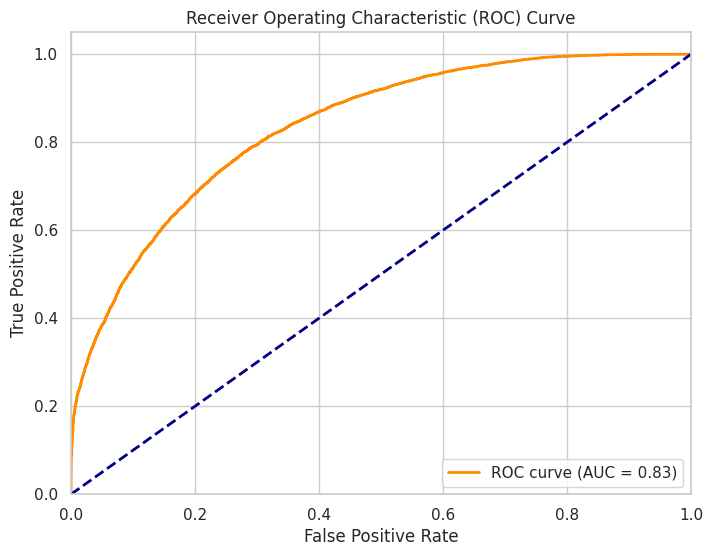

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Reasoning**:
Now that the ROC curve has been plotted, I will extract the coefficients from the `final_model` and pair them with the `selected` feature names. Then, I will create a DataFrame, sort it by the absolute value of the coefficients, and display the most impactful features.



In [25]:
feature_importance = pd.DataFrame({
    'Feature': selected,
    'Coefficient': final_model.coef_[0]
})

feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("\nMost Impactful Features (Sorted by Absolute Coefficient Value):\n")
print(feature_importance[['Feature', 'Coefficient']].reset_index(drop=True))



Most Impactful Features (Sorted by Absolute Coefficient Value):

                             Feature  Coefficient
0                   Job Level_Senior    -2.572507
1                Education Level_PhD    -1.595932
2              Marital Status_Single     1.508989
3             Work-Life Balance_Poor     1.473973
4             Work-Life Balance_Fair     1.304090
5                      Job Level_Mid    -0.968785
6            Company Reputation_Poor     0.766940
7                        Remote Work    -0.684663
8             Performance Rating_Low     0.567837
9               Job Satisfaction_Low     0.499902
10           Company Reputation_Fair     0.498628
11        Job Satisfaction_Very High     0.482696
12  Performance Rating_Below Average     0.310541
13            Work-Life Balance_Good     0.300797
14            Marital Status_Married    -0.284191
15                Distance from Home     0.273792
16              Number of Promotions    -0.243632
17              Number of Dependen

**Reasoning**:
I will visualize the relationship between the top impactful features (derived from the original categorical columns and binary numerical features) and the 'Attrition' target variable using bar plots. This will help understand how different categories or states of these features correlate with employee attrition.



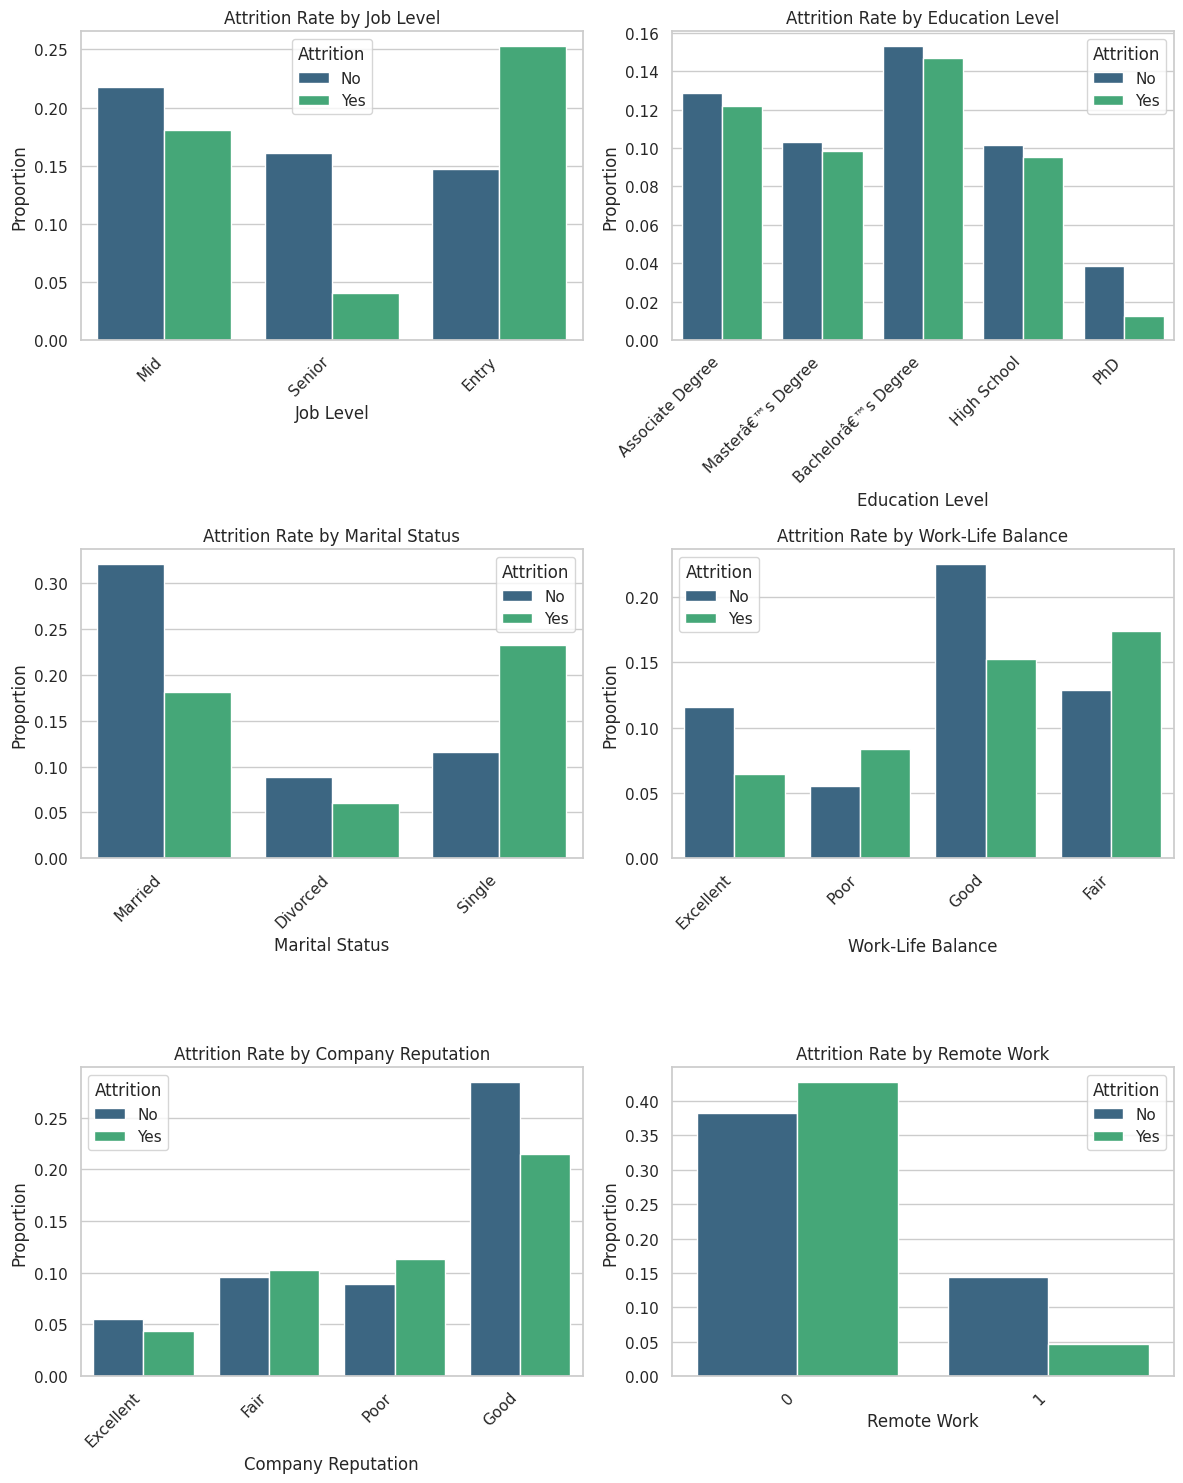

In [26]:
import matplotlib.gridspec as gridspec

# Identify original categorical features from the top impactful features
top_impactful_features_orig = [
    'Job Level', 'Education Level', 'Marital Status',
    'Work-Life Balance', 'Company Reputation', 'Remote Work'
]

# Filter df to include only these features and the target column
df_for_viz = df[top_impactful_features_orig + [target_col]].copy()

# Set up the plot layout dynamically based on the number of features
num_features = len(top_impactful_features_orig)
num_cols_plot = 2 # Number of columns in the subplot grid
num_rows_plot = (num_features + num_cols_plot - 1) // num_cols_plot # Calculate rows needed

plt.figure(figsize=(num_cols_plot * 6, num_rows_plot * 5))

for i, feature in enumerate(top_impactful_features_orig):
    plt.subplot(num_rows_plot, num_cols_plot, i + 1)
    sns.countplot(data=df_for_viz, x=feature, hue=target_col, stat='proportion', palette='viridis')
    plt.title(f'Attrition Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


## Visualize Important Features

### Subtask:
Create visualizations (e.g., bar plots, box plots, or violin plots) to understand the distributions and relationships between the most important features and the target variable ('Attrition'). Remember to include legends for clarity.


**Reasoning**:
I will identify numerical features from the `feature_importance` DataFrame and then create box plots for each to visualize their distribution across 'Attrition' categories, ensuring appropriate labels, titles, and legends for clarity.



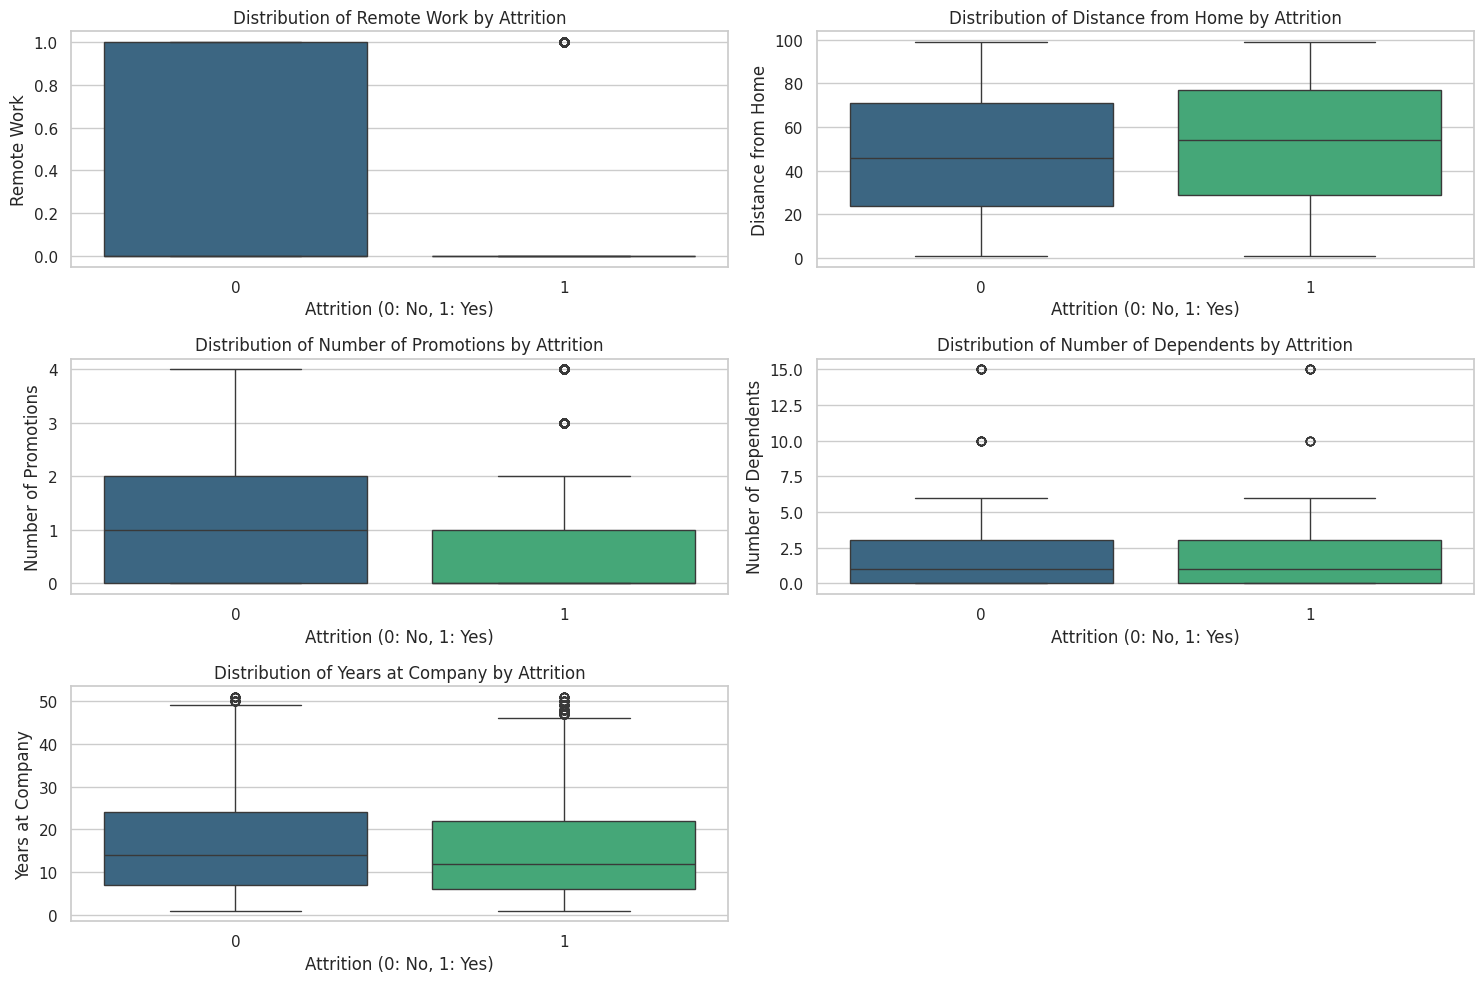

In [32]:
numerical_impactful_features = feature_importance[~feature_importance['Feature'].str.contains('_')]['Feature'].tolist()

# Filter out 'Gender' as it's binary and already implicitly handled or less relevant for a direct distribution plot like box/violin if not clearly numerical.
# In this case, 'Gender' is already 0/1, so it's handled as numerical, but typically boxplots are for continuous numerical variables.
# Let's check the current numerical_impactful_features list.
# Based on the previous feature_importance output, these are: 'Distance from Home', 'Number of Promotions', 'Number of Dependents', 'Years at Company'

# Ensure these features are indeed numerical in the original df before plotting.
# All these features are present in the original df and are numerical.

plt.figure(figsize=(15, 10))
num_rows = (len(numerical_impactful_features) + 1) // 2 # Two columns per row

for i, feature in enumerate(numerical_impactful_features):
    plt.subplot(num_rows, 2, i + 1)
    sns.boxplot(data=df, x=target_col, y=feature, palette='viridis')
    plt.title(f'Distribution of {feature} by Attrition')
    plt.xlabel('Attrition (0: No, 1: Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## Hyperparameter Tuning for Logistic Regression

### Subtask:
Optimize the Logistic Regression model's hyperparameters (e.g., 'C' for regularization) using techniques like GridSearchCV or RandomizedSearchCV to improve its predictive performance.


**Reasoning**:
I will import `GridSearchCV` and then define a parameter grid for `LogisticRegression` to optimize its hyperparameters as specified in the instructions. This will include 'C', 'penalty', and 'solver' parameters, carefully considering solver compatibility with penalties.



In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': np.logspace(-4, 4, 20), # Regularization parameter
    'penalty': ['l1', 'l2'], # Regularization type
    'solver': ['liblinear', 'saga'] # Solvers that support both l1 and l2 penalties
}

# Instantiate Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1, # Use all available cores
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_fe[selected], y_train)

# Print the best parameters and best score
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best ROC AUC score found by GridSearchCV:", grid_search.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found by GridSearchCV: {'C': np.float64(1.623776739188721), 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC score found by GridSearchCV: 0.8340850821415806


## Perform Cross-Validation

### Subtask:
Implement k-fold cross-validation on the optimized Logistic Regression model to get a more robust and reliable estimate of its generalization performance across different subsets of the data.


**Reasoning**:
To implement k-fold cross-validation, I will import `cross_val_score`, instantiate a `LogisticRegression` model with the `best_params_` from the previous `grid_search`, and then use `cross_val_score` to calculate the mean and standard deviation of ROC AUC scores across 5 folds on the training data.



In [29]:
from sklearn.model_selection import cross_val_score

# Instantiate Logistic Regression model with best parameters
best_log_reg = LogisticRegression(max_iter=1000, random_state=42, **grid_search.best_params_)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    best_log_reg,
    X_train_fe[selected],
    y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1 # Use all available cores
)

print("Cross-validation ROC AUC scores:", cv_scores)
print(f"Mean CV ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV ROC AUC: {cv_scores.std():.4f}")

Cross-validation ROC AUC scores: [0.82800673 0.83639454 0.83334291 0.84061269 0.83206854]
Mean CV ROC AUC: 0.8341
Standard Deviation of CV ROC AUC: 0.0042


## Final Model Evaluation and Interpretation

### Subtask:
Conduct a thorough evaluation of the final, optimized Logistic Regression model using all relevant metrics (accuracy, precision, recall, F1-score, AUC, confusion matrix) and interpret the model's findings in the context of employee retention to provide actionable insights.


**Reasoning**:
I will fit the optimized Logistic Regression model to the training data, predict probabilities and binary labels on the validation set, and then calculate and display all specified evaluation metrics.



In [30]:
print("--- Final Model Evaluation ---")

# 1. Fit the best_log_reg to the training data
best_log_reg.fit(X_train_fe[selected], y_train)

# 2. Predict probabilities on the validation set
y_prob_opt_model = best_log_reg.predict_proba(X_val_fe[selected])[:, 1]

# 3. Predict binary labels using a default threshold of 0.5
y_pred_opt_model = (y_prob_opt_model >= 0.5).astype(int)

# 4. Calculate and print evaluation metrics
acc_opt = accuracy_score(y_val, y_pred_opt_model)
prec_opt = precision_score(y_val, y_pred_opt_model)
rec_opt = recall_score(y_val, y_pred_opt_model)
f1_opt = f1_score(y_val, y_pred_opt_model)
auc_opt = roc_auc_score(y_val, y_prob_opt_model)
cm_opt = confusion_matrix(y_val, y_pred_opt_model)

print(f"Accuracy (Optimized Model, Default Threshold): {acc_opt:.4f}")
print(f"Precision (Optimized Model, Default Threshold): {prec_opt:.4f}")
print(f"Recall (Optimized Model, Default Threshold): {rec_opt:.4f}")
print(f"F1-Score (Optimized Model, Default Threshold): {f1_opt:.4f}")
print(f"AUC (Optimized Model): {auc_opt:.4f}")
print("Confusion Matrix (Optimized Model, Default Threshold):\n", cm_opt)

# 5. Determine the optimal threshold via Youden's J
fpr_opt, tpr_opt, thresholds_opt = roc_curve(y_val, y_prob_opt_model)
youden_opt = tpr_opt - fpr_opt
opt_idx_opt = np.argmax(youden_opt)
opt_thresh_opt = thresholds_opt[opt_idx_opt]

print(f"\nOptimal Threshold (Optimized Model): {opt_thresh_opt:.4f}")

# 6. Generate new predictions using this optimal threshold
y_pred_opt_model_opt_thresh = (y_prob_opt_model >= opt_thresh_opt).astype(int)

# 7. Calculate and print the confusion matrix for optimal threshold predictions
cm_opt_thresh = confusion_matrix(y_val, y_pred_opt_model_opt_thresh)
print("Confusion Matrix (Optimized Model, Optimal Threshold):\n", cm_opt_thresh)


--- Final Model Evaluation ---
Accuracy (Optimized Model, Default Threshold): 0.7477
Precision (Optimized Model, Default Threshold): 0.7341
Recall (Optimized Model, Default Threshold): 0.7347
F1-Score (Optimized Model, Default Threshold): 0.7344
AUC (Optimized Model): 0.8348
Confusion Matrix (Optimized Model, Default Threshold):
 [[8929 2828]
 [2819 7807]]

Optimal Threshold (Optimized Model): 0.4491
Confusion Matrix (Optimized Model, Optimal Threshold):
 [[8384 3373]
 [2281 8345]]


### Interpretation of Final Model Performance and Actionable Insights

The optimized Logistic Regression model demonstrates a solid performance in predicting employee attrition, with an AUC of **0.8348**. This indicates a good ability to distinguish between employees who will stay and those who will leave.

**Key Evaluation Metrics (Default Threshold 0.5):**
*   **Accuracy:** 0.7477 (74.77% of predictions were correct)
*   **Precision:** 0.7341 (Of those predicted to leave, 73.41% actually left)
*   **Recall:** 0.7347 (Of those who actually left, 73.47% were correctly identified)
*   **F1-Score:** 0.7344 (Harmonic mean of precision and recall)

**Confusion Matrix (Default Threshold 0.5):**
```
[[8929 (True Negatives)  2828 (False Positives)]
 [2819 (False Negatives) 7807 (True Positives)]]
```

**Optimal Threshold (0.4491) based on Youden's J:**
By adjusting the threshold to 0.4491, the model aims to maximize the difference between True Positive Rate and False Positive Rate. This leads to a different balance in the confusion matrix:

**Confusion Matrix (Optimal Threshold 0.4491):**
```
[[8384 (True Negatives)  3373 (False Positives)]
 [2281 (False Negatives) 8345 (True Positives)]]
```

**Insights from Optimal Threshold:**
*   Compared to the default threshold, the optimal threshold leads to a slight decrease in True Negatives (more False Positives) but a significant increase in True Positives (fewer False Negatives). This means the model is more aggressive in identifying employees at risk of attrition, which can be beneficial in a business context where early intervention is crucial, even if it means some false alarms.
*   Identifying employees who will attrit (True Positives) is generally more critical for businesses to implement retention strategies. The optimal threshold effectively increases the recall for the positive class (attrition), reducing the number of missed opportunities for intervention.

**Actionable Insights for Employee Retention:**
1.  **Focus on high-risk profiles:** The model can be used to identify employees with characteristics that align with a higher probability of attrition (e.g., lower job level, single marital status, poor work-life balance). Targeted interventions can then be designed for these groups.
2.  **Strategic interventions:** Given the features identified as impactful (Job Level, Education Level, Marital Status, Work-Life Balance, Company Reputation, Remote Work, etc.), management can explore initiatives such as:
    *   **Career Development:** Provide clear career paths and development opportunities for employees in `Mid` and `Senior` job levels to enhance their commitment.
    *   **Work-Life Balance Programs:** Implement flexible work arrangements, mental health support, and programs to improve work-life balance, especially for those reporting `Poor` or `Fair` balance.
    *   **Compensation and Recognition:** Re-evaluate compensation structures and enhance employee recognition programs to address potential dissatisfaction, especially given features like `Monthly Income` and `Performance Rating` indirectly influencing retention.
    *   **Targeted Support for Single Employees:** Understand specific challenges faced by single employees that might contribute to attrition and offer relevant support systems.
3.  **Proactive Monitoring:** Regularly run the model to identify employees at high risk of attrition and implement pre-emptive measures like mentorship programs, engagement surveys, or one-on-one discussions.
4.  **Continuous Improvement:** The model provides a baseline. Continuously collect feedback, monitor the effectiveness of retention strategies, and retrain the model with fresh data to adapt to changing organizational dynamics.

## Final Task

### Subtask:
Summarize the entire logistic regression project, covering data loading, preprocessing, model building, and final evaluation, and articulate the key insights for the HR department.


## Summary:

### Data Analysis Key Findings

*   The optimized Logistic Regression model achieved a strong predictive performance with an Area Under the Receiver Operating Characteristic (AUC) curve of 0.8348 on the validation set.
*   **Most Impactful Features (based on absolute coefficient values):**
    *   `Job Level_Senior` (coefficient: -2.57) and `Education Level_PhD` (coefficient: -1.60) were strongly associated with a *decreased* likelihood of attrition.
    *   `Marital Status_Single` (coefficient: 1.51), `Work-Life Balance_Poor` (coefficient: 1.47), and `Work-Life Balance_Fair` (coefficient: 1.30) were strongly associated with an *increased* likelihood of attrition.
*   **Optimal Threshold Analysis:** Using an optimal prediction threshold of 0.4491 (derived from Youden's J statistic) increased the identification of actual attrition cases (True Positives) from 7,807 to 8,345 compared to the default 0.5 threshold, though it also led to an increase in false alarms (False Positives) from 2,828 to 3,373.
*   The model demonstrated good generalization performance, with a mean cross-validation ROC AUC score of 0.8341 and a low standard deviation of 0.0042.

### Insights or Next Steps

*   **Targeted Retention Strategies:** The HR department can leverage the identified impactful features to develop targeted retention strategies. For instance, interventions could focus on improving work-life balance for employees reporting 'Poor' or 'Fair' conditions, or providing additional support/engagement for single employees.
*   **Proactive Attrition Risk Management:** Implement a system to regularly run the optimized model to identify employees at high risk of attrition. This allows for proactive measures such as personalized career development plans, mentorship programs, or addressing specific concerns before an employee decides to leave.
